ПУНКТ 1

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
#2.1
loc, scale, N = 3, 2, 10000
s = np.random.logistic(loc, scale, N)

----
----
----
----
----

ПУНКТ 2

In [78]:
min_s = min(s)
max_s = max(s)
mean_s = s.mean()
uncorrect_variance = np.var(s, ddof = 0) #неисправленная дисперсия
correct_variance = np.var(s, ddof = 1)   #исправленная дисперсия
standart_deviation = np.std(s, ddof = 1)  # или просто извлечь корень из correct_variance (среднеквадр отклонение)

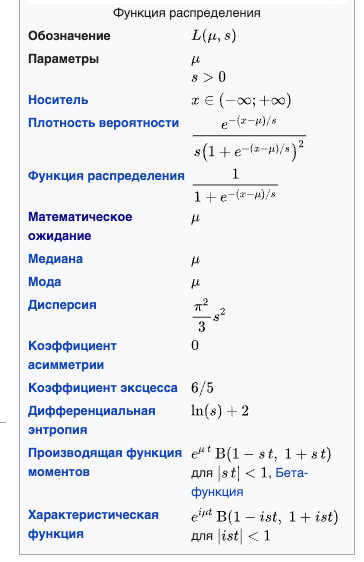

In [79]:
print('Минимальное значение выборки: ', min_s)
print('Максимальное значение выборки: ', max_s)
print('Выборочное среденее: ', mean_s)
print('Выборочная (неисправленная) дисперсия: ',  uncorrect_variance)
print('Выборочная (исправленная) дисперсия: ',  correct_variance)
print('Среднеквадратическое от исправленной дисперсии: ', standart_deviation)

Минимальное значение выборки:  -14.182594058126124
Максимальное значение выборки:  19.590268395994407
Выборочное среденее:  2.9965484515592378
Выборочная (неисправленная) дисперсия:  13.193433403887466
Выборочная (исправленная) дисперсия:  13.194752879175383
Среднеквадратическое от исправленной дисперсии:  3.632458241903874


-------------------------------------------------------------------------------------------------------------------

Письменный расчет мат ожидания и дисперсии
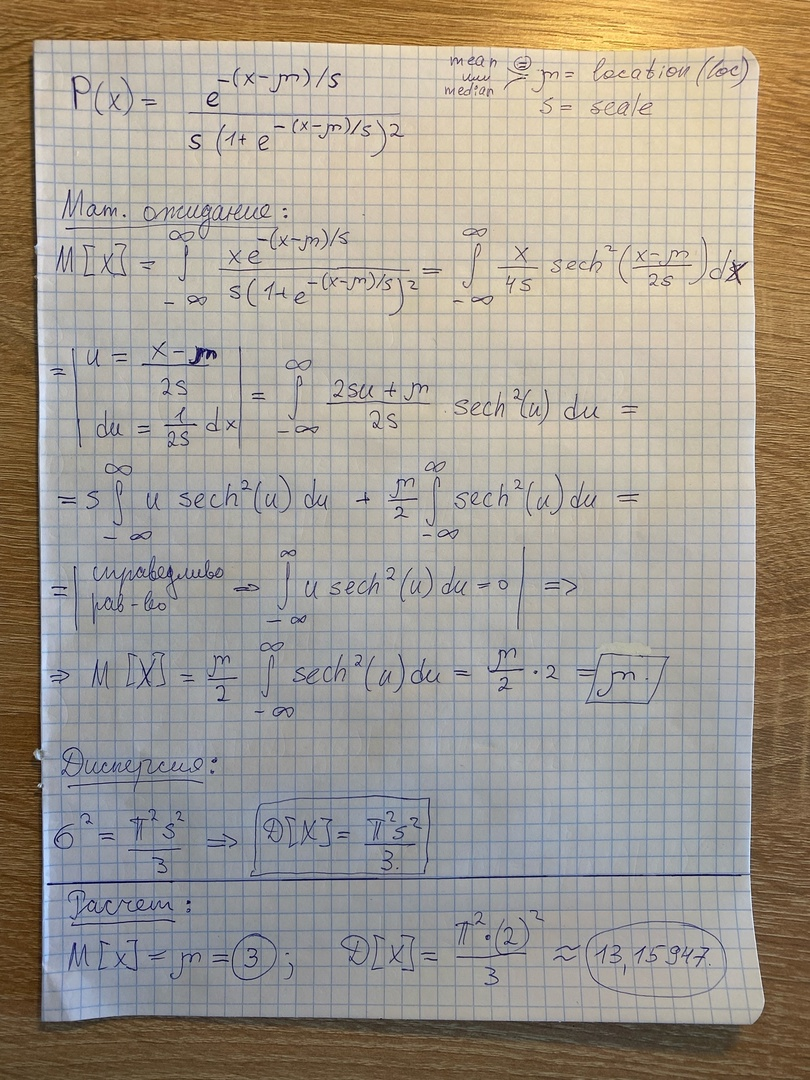

In [80]:
#пункт 2.3
def analysis(n):
    l, s, n = 3, 2, n
    array = np.random.logistic(l, s, n)
    mean_s = array.mean()                         # выборочное среднее
    correct_variance = np.var(array, ddof = 1)    #исправленная дисперсия
    return [array, mean_s, correct_variance]

In [81]:
def create_frame(n):
    frame = [analysis(n) for i in range(1000)]                        # сгенерировали 1000 выборок по n элементов
#    print(len(frame[0][0]))
    table_dict = {"array": [frame[i][0] for i in range(1000)],
                 "mean": [frame[i][1] for i in range(1000)],
                 "variance": [frame[i][2] for i in range(1000)]}
    df = pd.DataFrame(table_dict)
    return df

In [82]:
# построение графиков
def draw_graph(data_frame):
    theoretical_mean = 3  # Математическое ожидание
    theoretical_variance = (np.pi**2 * 2**2) / 3  # Дисперсия 

    # Построение графиков
    plt.figure(figsize=(20, 10))     # задает размер графика (ширина, длина)

    # График выборочного среднего
    plt.plot(data_frame['mean'], label='Выборочное среднее')
    plt.axhline(theoretical_mean, color='red', linestyle='-', label='Теоретическое среднее', linewidth = 5)
    plt.xlabel('Номер реализации', fontsize = 15)
    plt.ylabel('Выборочное среднее', fontsize = 15)
    plt.legend()



    # График исправленной выборочной дисперсии
    plt.figure(figsize=(20, 10))     # задает размер графика (ширина, длина)
    plt.plot(data_frame['variance'], label='Исправленная выборочная дисперсия')
    plt.axhline(theoretical_variance, color='red', linestyle='-', label='Теоретическая дисперсия', linewidth = 5)
    plt.xlabel('Номер реализации', fontsize = 20)
    plt.ylabel('Исправленная выборочная дисперсия', fontsize = 20)
    plt.legend()

    plt.tight_layout()
    plt.show()


--------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ПОСТРОЕНИЕ ДЛЯ N = 10

                                                 array      mean   variance
0    [-7.82074207516613, -0.9082101161696468, -1.48...  1.214862  20.707309
1    [-2.891026801882605, 1.758421262090442, 11.479...  3.952459  20.312199
2    [3.1818216447339367, 9.464351427759642, 8.7078...  1.674313  30.594493
3    [2.9315296817087986, 5.210540678955863, 4.0947...  2.798482  13.818768
4    [0.8696923756989041, 2.975209315107382, 4.8492...  3.625969   4.693937
..                                                 ...       ...        ...
995  [8.322757465076027, 5.937226297078187, 0.59652...  4.120752   9.654465
996  [-0.6292888754080912, 1.0039895297774195, 12.1...  1.407948  20.777417
997  [9.031742300582561, -2.025773531789814, 6.8882...  3.286580  13.587216
998  [5.2168285532211485, 4.942993668811162, 0.3935...  2.501557   6.342257
999  [4.889015132644949, -3.945537179278835, -4.631...  1.108988  20.862638

[1000 rows x 3 columns]


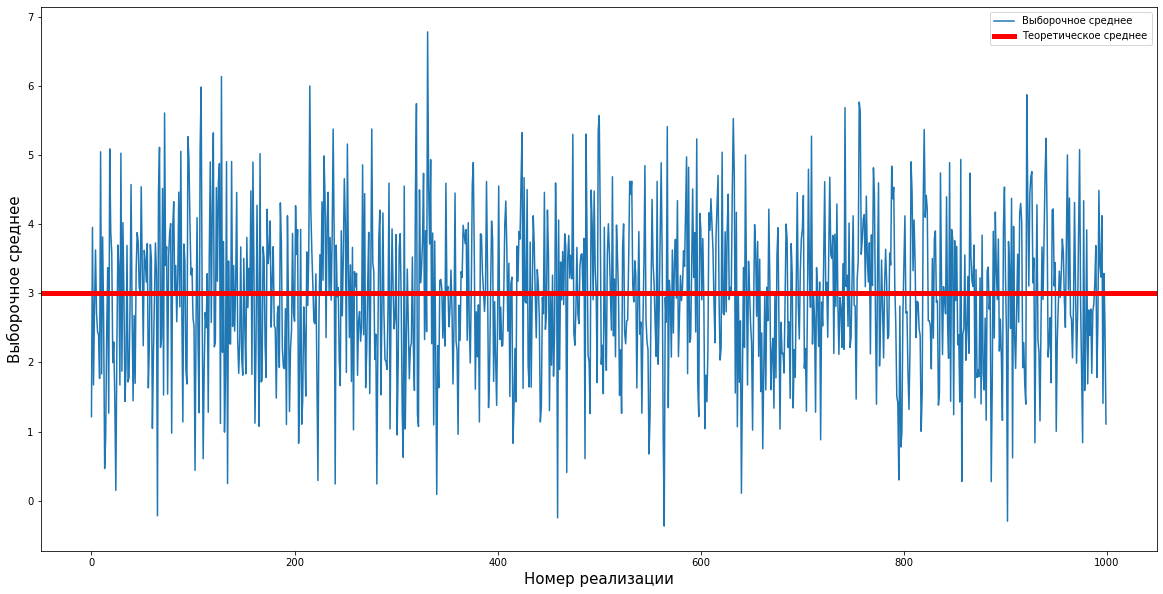

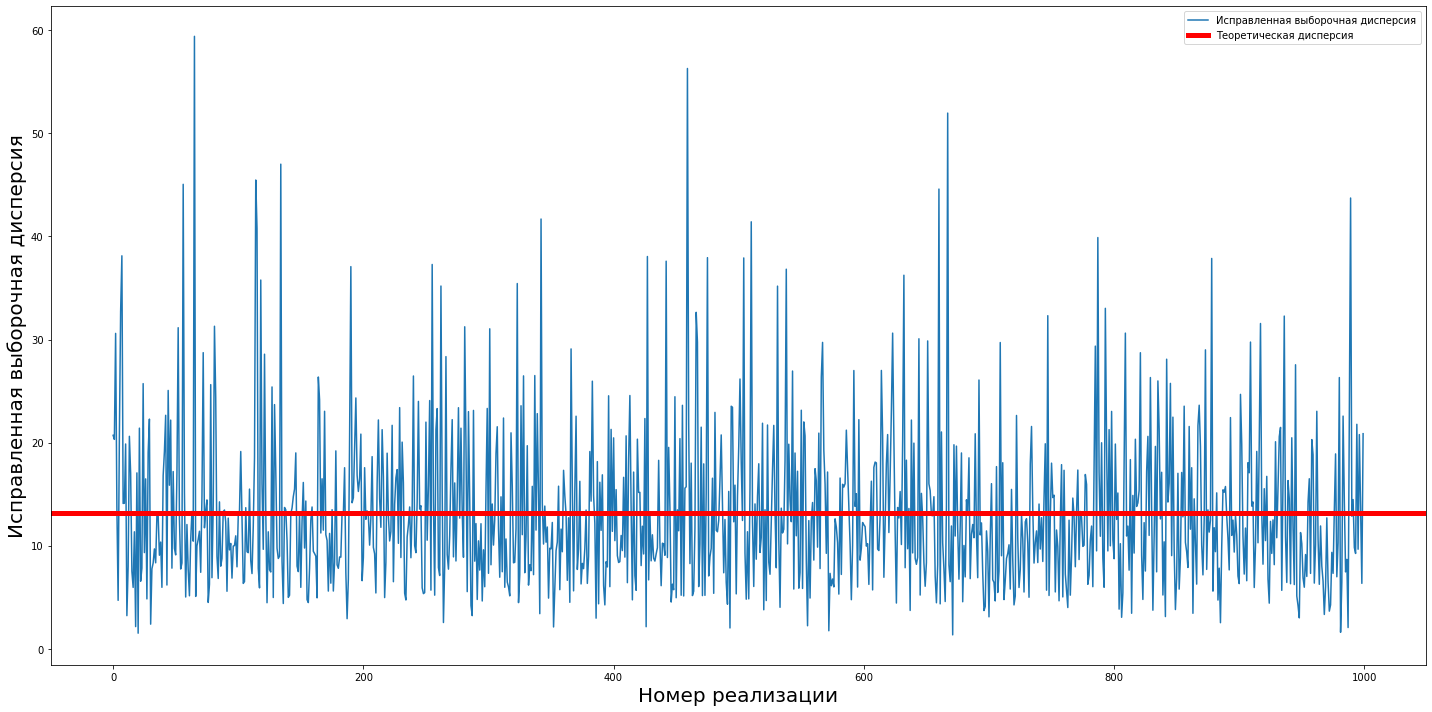

In [83]:
df_10 = create_frame(10)
print(df_10)
draw_graph(df_10)

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

ПОСТРОЕНИЕ ДЛЯ N = 50

In [84]:
df_50 = create_frame(50)
print(df_50)

                                                 array      mean   variance
0    [-1.9990901094629336, -1.9764897156096977, 4.1...  2.557572  14.438299
1    [4.420942269077003, 1.115534823002841, 5.41625...  3.094888  11.068045
2    [12.613035746404593, 6.08674124136985, 4.28339...  3.144096  15.278282
3    [8.031898952788769, 8.147606851100246, 3.68876...  3.918666  11.574642
4    [6.404976081387378, -1.163336114664645, 3.7133...  2.964669  15.263970
..                                                 ...       ...        ...
995  [2.894497978840068, -6.495736745982699, -0.178...  2.923541  14.758745
996  [0.3635383817845703, 2.8260709548289693, 9.080...  2.794659  13.762557
997  [-5.124473268276583, 3.7613895946485156, 2.775...  3.151096  18.763836
998  [-1.6344015154220441, 3.0751865875563595, 8.07...  2.614467  14.864672
999  [4.902520923411443, 0.5476057073657441, 3.2198...  3.463545  12.428182

[1000 rows x 3 columns]


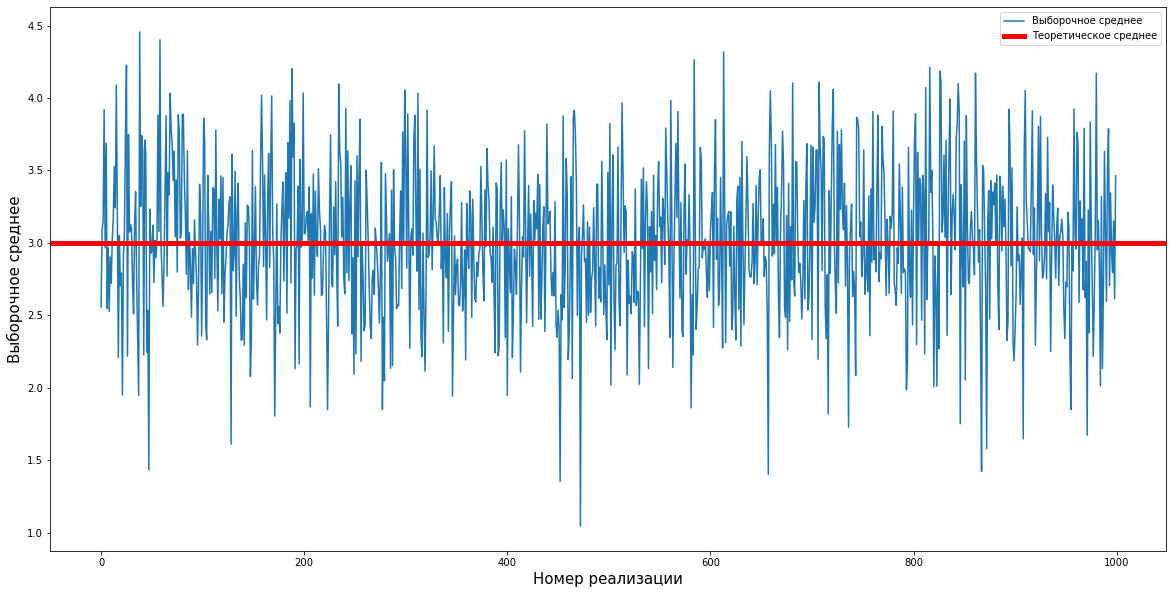

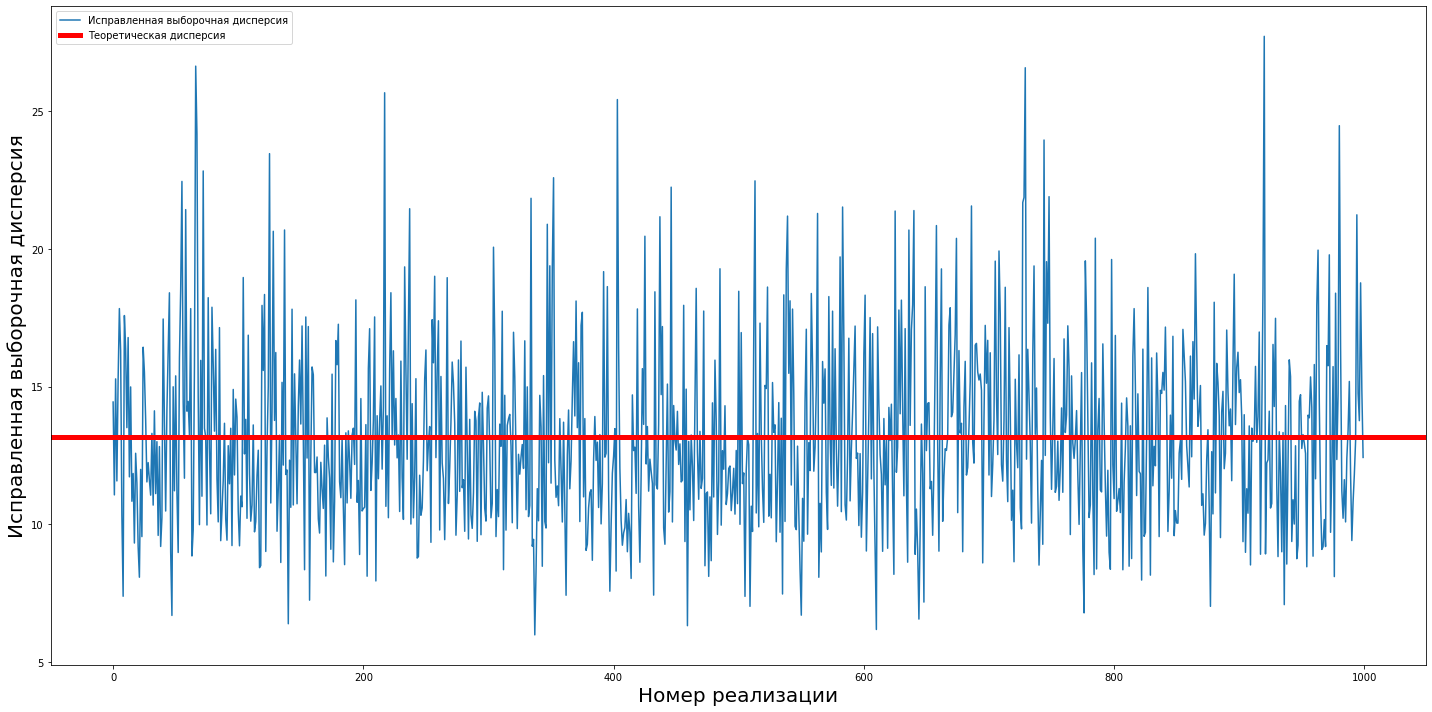

In [85]:
draw_graph(df_50)

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

ПОСТРОЕНИЕ ДЛЯ N = 100

In [86]:
df_100 = create_frame(100)
print(df_100)

                                                 array      mean   variance
0    [1.6583156034603792, 6.0721087575543375, 5.418...  3.237209   9.229518
1    [6.062169817715063, -4.069872544547034, -2.489...  3.079835  13.276954
2    [6.52613953839308, 3.537870941097081, 0.289037...  2.960563  19.687126
3    [8.400676326857475, 7.11607120700784, 2.145986...  3.313540  10.148551
4    [1.8484757868476789, 11.171694612646181, 1.601...  3.526500  13.647430
..                                                 ...       ...        ...
995  [4.018288634574139, -2.2877742924038937, 1.976...  3.149398  16.129093
996  [-2.601416306506919, 2.6689330213038542, 5.056...  3.041011  10.568906
997  [2.419988081575086, 6.174035104951473, 6.03358...  2.449093  11.658028
998  [-0.5224482945937918, 4.338525410888158, 3.729...  3.458632  11.042775
999  [2.2567845061659155, 8.361112465865006, 0.1496...  3.296849  10.668718

[1000 rows x 3 columns]


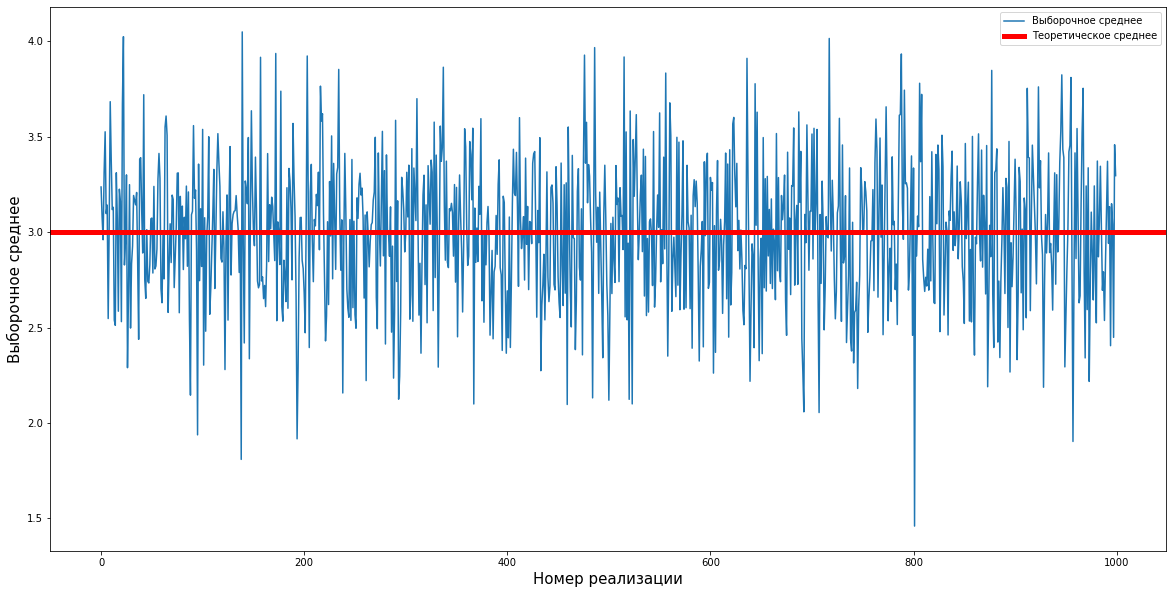

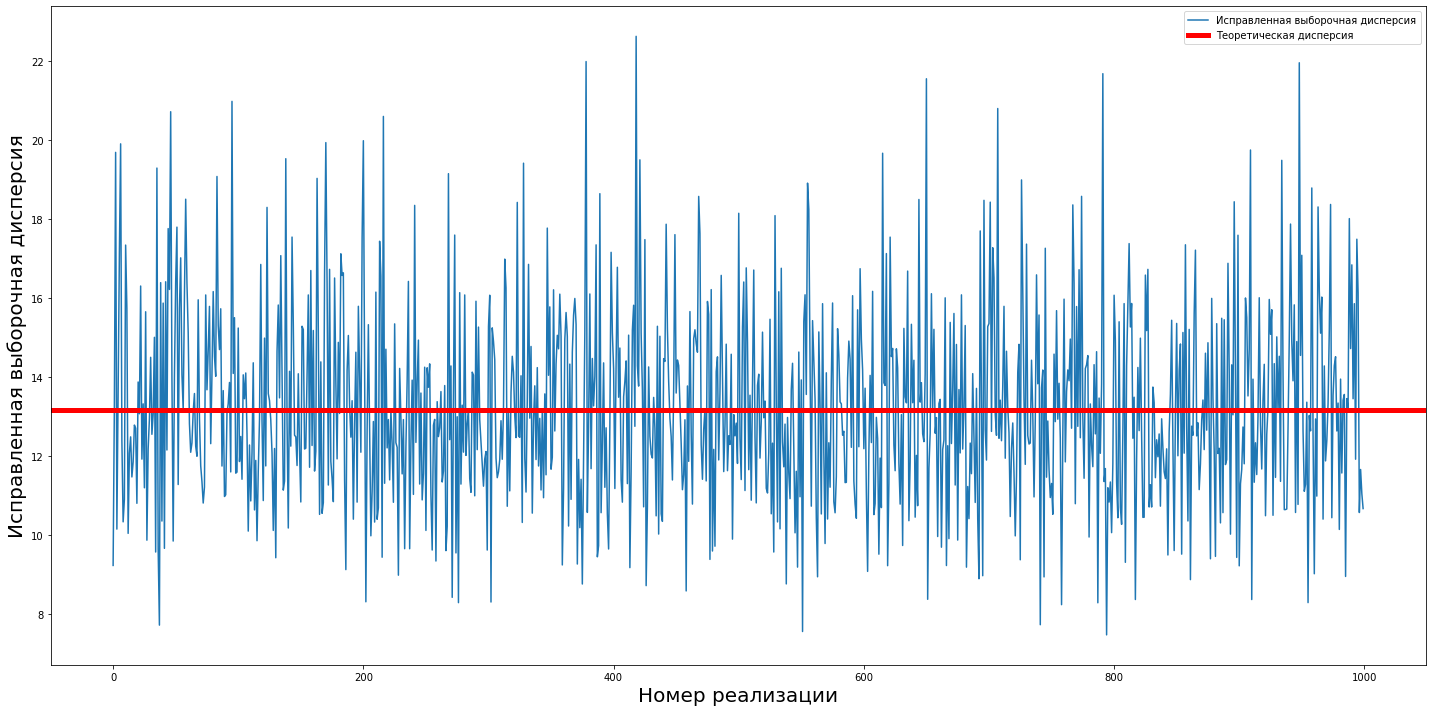

In [87]:
draw_graph(df_100)

-------
-------

Для N = 10000

In [88]:
df_10000 = create_frame(10000)
print(df_10000)

                                                 array      mean   variance
0    [9.392026017358585, 1.9345756981447655, 1.1037...  3.026162  12.955354
1    [5.725200492775888, 9.690933767759834, 2.46809...  2.977552  13.276314
2    [10.37945245005696, 1.1299506790570415, 5.7848...  2.973437  13.049084
3    [2.7885077753211966, 6.030043608337149, 4.4033...  2.958531  12.976578
4    [1.3526130344073863, 7.792780025744323, 1.0848...  3.014256  13.708342
..                                                 ...       ...        ...
995  [1.821713733264169, -2.6802127048190583, 4.705...  3.020408  13.056958
996  [-6.548078432189929, -5.992146999144282, -1.18...  2.992070  12.779271
997  [3.350058935086765, 2.4432180465437234, 6.6544...  2.978437  12.975511
998  [0.9268890607243816, 7.365130720224983, 3.8472...  3.008847  13.421083
999  [0.8657054923963075, 1.3329099683204588, 6.865...  2.955856  13.531669

[1000 rows x 3 columns]


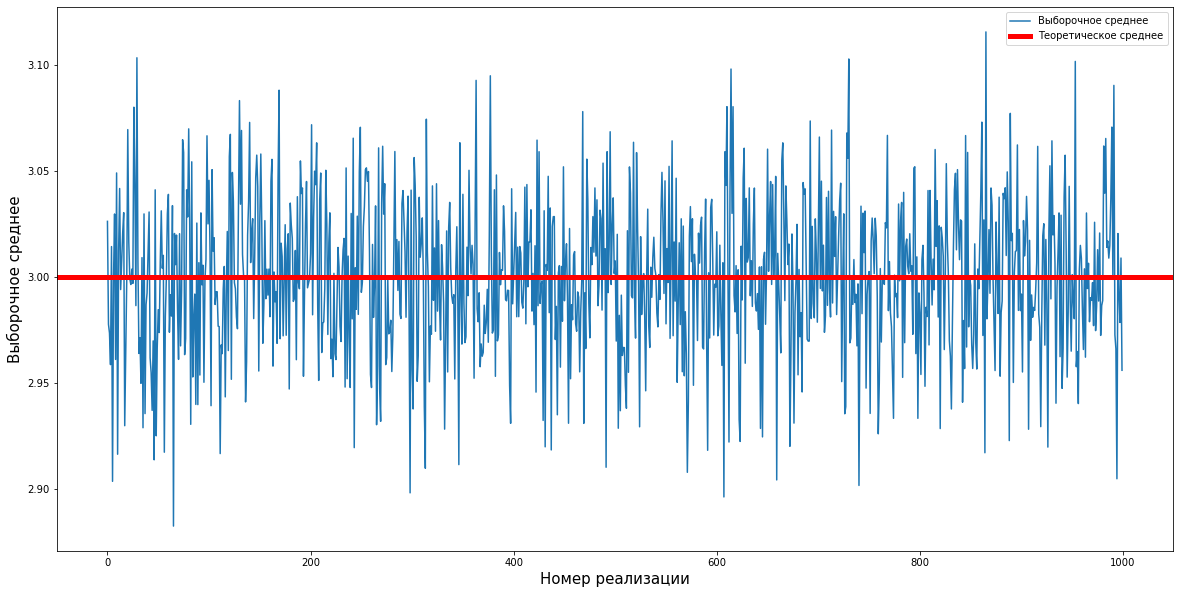

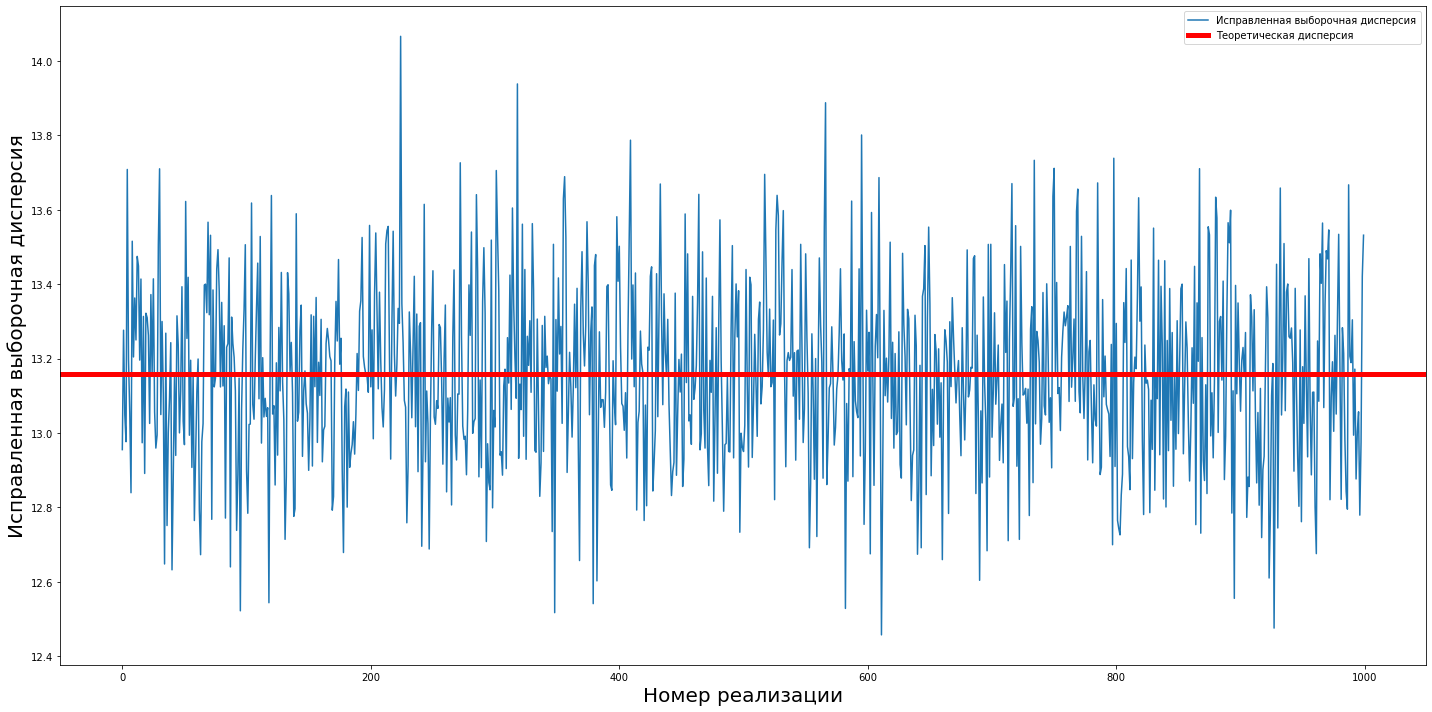

In [89]:
draw_graph(df_10000)

ВЫВОД: при увеличении объема выборки(при увеличении N) мат ожидание и дисперсия стремятся к вычисленным вручную значениям (колебания от вычисленной величины начинают уменьшаться) (смотреть внимательно на ось Oy)


-------
------



In [90]:
#Пункт 2.4

df = create_frame(10000)
average_from_mean = df['mean'].mean()
average_from_variance = df['variance'].mean()

print("Среднее от выборочного среднего: ", average_from_mean)
print("Среднее оn исправленной выборочной дисперсии: ", average_from_variance)


Среднее от выборочного среднего:  2.998645552575307
Среднее оn исправленной выборочной дисперсии:  13.160243170559633


ВЫВОД: Значения близки друг к другу (и близки к значениям вычисленным вручную)

-----
-----
-----
-----
-----

ПУНКТ 3
(работа с выборкой из пункта 1)

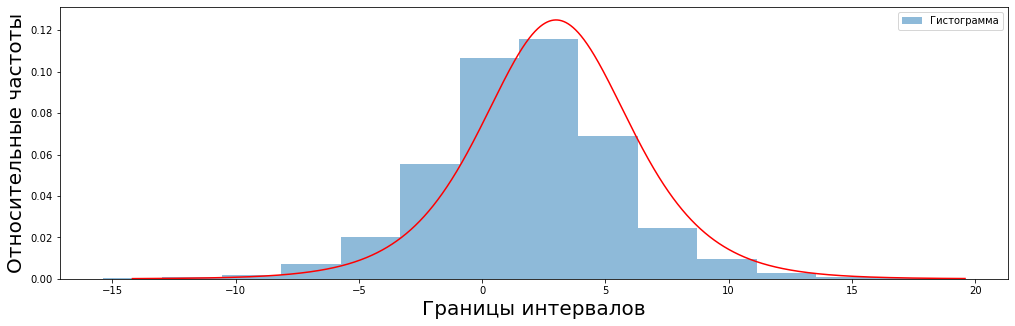

In [97]:
from scipy.stats import logistic

r = 1 + int(np.log2(10000))                   
h = (max_s - min_s)/r
interval_boundaries = np.linspace(min_s, max_s, r+1)

#в interval_boundaries сгенерили просто r+1 число
#потом по ним в np.histogram разбили на r+1 интервалов
hist_counts, _ = np.histogram(s, bins = interval_boundaries)  
# his_count - массив, в котором хранится кол-во вхождений в элементов интеравал 
# _ - это массив границ

relative_frequencies = hist_counts / (h * 10000)

plt.figure(figsize=(17, 5))
plt.bar(interval_boundaries[:-1], relative_frequencies, width=h, alpha=0.5, label='Гистограмма')
plt.xlabel('Границы интервалов', fontsize = 20)
plt.ylabel('Относительные частоты', fontsize = 20)
plt.legend()

s_theoretical = np.linspace(min_s, max_s, 10000)
pdf_logistic = logistic.pdf(s_theoretical, loc, scale) # посчитали значения плотности вероятности для каждого значения из выборки
plt.plot(s_theoretical, pdf_logistic, 'r-', label='Логистическое распределение')
#s_theoretical - значения по 0x
#pdf_logistic - значения по 0y

plt.show()

-----
-----
-----

ПУНКТ 4

In [92]:
grouped_mean = np.sum((interval_boundaries[:-1] + interval_boundaries[1:]) * 0.5 * hist_counts) / len(s_theoretical)

# Вычисление выборочной дисперсии по группированным данным
grouped_variance = np.sum(((interval_boundaries[:-1] + interval_boundaries[1:]) * 0.5 - grouped_mean)**2 * hist_counts) / (len(s_theoretical) - 1)
print("Выборочное среднее для группированных данных: ", grouped_mean)
print("Выборочная дисперсия для группированных данных: ",grouped_variance)
print("----------------------------")
print("Выборочные характеристки из пункта 2")
print('Выборочное среденее: ', mean_s)
print('Выборочная (исправленная) дисперсия: ',  correct_variance)


Выборочное среднее для группированных данных:  2.996213663894096
Выборочная дисперсия для группированных данных:  13.550771146198345
----------------------------
Выборочные характеристки из пункта 2
Выборочное среденее:  2.9965484515592378
Выборочная (исправленная) дисперсия:  13.194752879175383


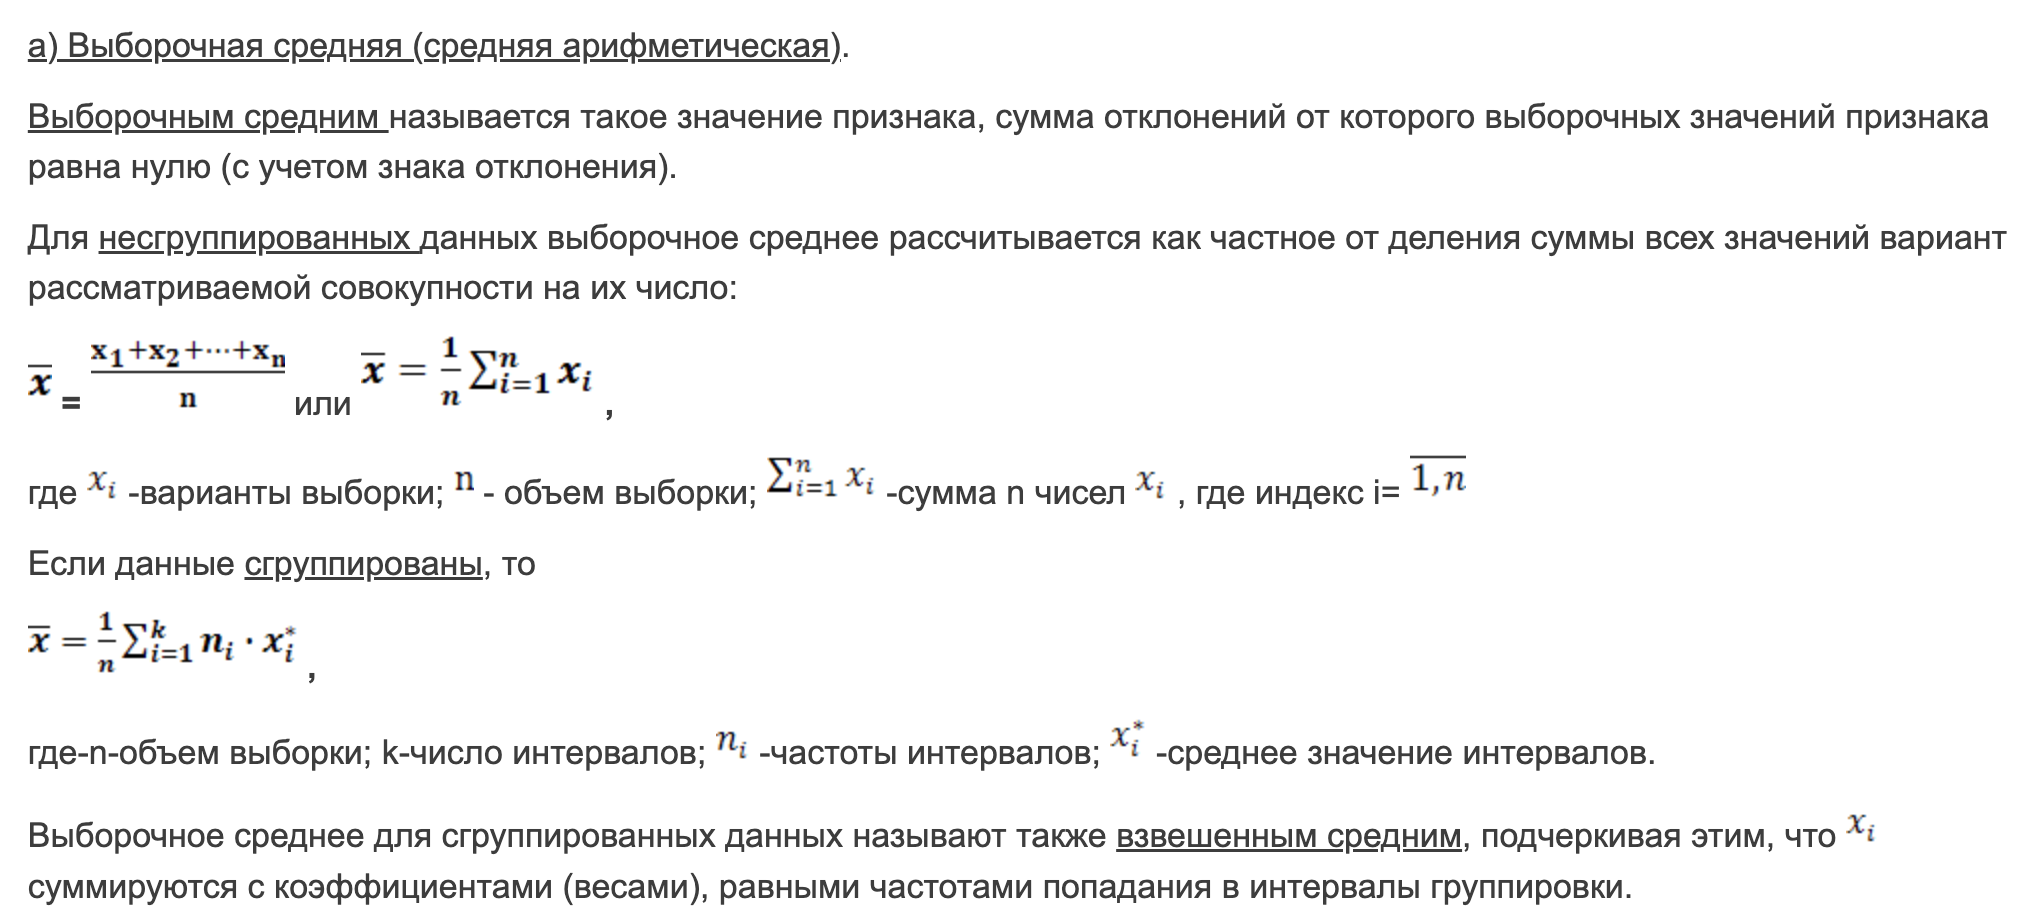

----
----
----

ПУНКТ 5

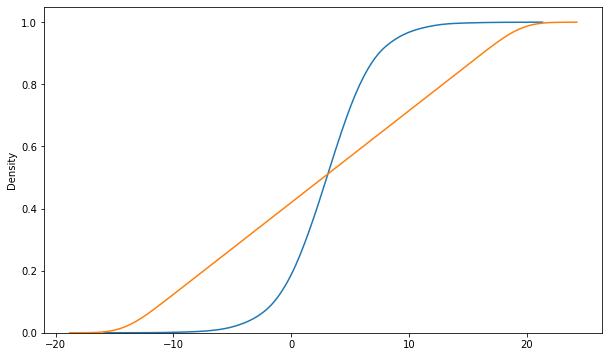

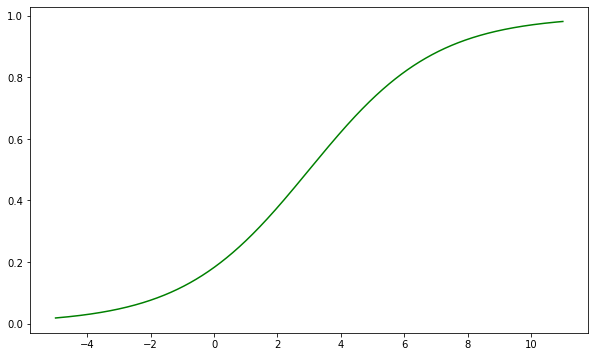

In [98]:
plt.figure(figsize=(10, 6))
#Эмпирическая функция для груп/негруп данных
import seaborn as sns
sns.kdeplot(s, cumulative=True)
sns.kdeplot(s_theoretical, cumulative=True)



# Параметры распределения
loc, scale = 3, 2

# Создание массива значений для x
x_theoretical = np.linspace(loc - 4 * scale, loc + 4 * scale, 1000)

# Рассчет теоретической функции распределения
cdf_theoretical = logistic.cdf(x_theoretical, loc=loc, scale=scale)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x_theoretical, cdf_theoretical, label='Теоретическая функция распределения', color='green')
